In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import optuna
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
train = pd.read_csv('train.csv')

In [9]:
train

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF


In [10]:
# def NDVI(df):
#     NDVI_series = (df['b8'] - df['b4']) / (df['b8'] + df['b4'])
#     return NDVI_series
    
# def Moisture_index(df):
#     Moist = (df['b8_a'] - df['b11']) / (df['b8_a'] + df['b11'])
#     return Moist

def NDWI(df):
    NDWI_series = (df['b3'] - df['b8']) / (df['b3'] + df['b8'])
    return NDWI_series

def NDSI(df):
    NDSI_series = (df['b3'] - df['b11']) / (df['b3'] + df['b11'])
    return NDSI_series

def BSI(df):
    bsi_index = ((df['b11'] + df['b4']) - (df['b8'] + df['b2'])) / ((df['b11'] + df['b4']) + (df['b8'] + df['b2']))
    return bsi_index
    
def NBR1(df):
    return (df['b8'] - df['b11']) / (df['b8'] + df['b11'])

def NBR3(df):
    return (df['b8'] - df['b12']) / (df['b8'] + df['b12'])

def NBR4(df):
    return (df['b8_a'] - df['b12']) / (df['b8_a'] + df['b12'])

def AFRI1(df):
    return (df['b8'] - (0.66 * df['b11'])) / (df['b8'] + (0.66 * df['b11']))

def AFRI2(df):
    return (df['b8_a'] - (0.66 * df['b11'])) / (df['b8_a'] + (0.66 * df['b11']))

def AFRI3(df):
    return (df['b8'] - (0.66 * df['b12'])) / (df['b8'] + (0.66 * df['b12']))

def AFRI4(df):
    return (df['b8_a'] - (0.66 * df['b12'])) / (df['b8_a'] + (0.66 * df['b12']))

def BNDVI1(df):
    return (df['b8'] - df['b2']) / (df['b8'] + df['b2'])

def BNDVI2(df):
    return (df['b8_a'] - df['b2']) / (df['b8_a'] + df['b2'])

def BWDRVI1(df):
    return ((0.1 * df['b8']) - df['b2']) / ((0.1 * df['b8']) + df['b2'])

def BWDRVI2(df):
    return ((0.1 * df['b8_a']) - df['b2']) / ((0.1 * df['b8_a']) + df['b2'])

def NDVI1(df):
    return (df['b8'] - df['b4']) / (df['b8'] + df['b4'])

def NDVI2(df):
    return (df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4'])

def WDRVI1(df):
    return ((0.1 * df['b8']) - df['b4']) / ((0.1 * df['b8']) + df['b4'])

def WDRVI2(df):
    return ((0.1 * df['b8_a']) - df['b4']) / ((0.1 * df['b8_a']) + df['b4'])

def SAVI1(df):
    return ((1 + 0.5) * (df['b8'] - df['b4'])) / (df['b8'] + df['b4'] + 0.5)

def SAVI2(df):
    return ((1 + 0.5) * (df['b8_a'] - df['b4'])) / (df['b8_a'] + df['b4'] + 0.5)

def GNDVI1(df):
    return (df['b8'] - df['b3']) / (df['b8'] + df['b3'])

def GNDVI2(df):
    return (df['b8_a'] - df['b3']) / (df['b8_a'] + df['b3'])

def NDRE1(df):
    return (df['b8'] - df['b5']) / (df['b8'] + df['b5'])

def NDRE2(df):
    return (df['b8'] - df['b6']) / (df['b8'] + df['b6'])

def NDRE3(df):
    return (df['b8'] - df['b7']) / (df['b8'] + df['b7'])

def NDRE4(df):
    return (df['b8_a'] - df['b5']) / (df['b8_a'] + df['b5'])

def NDRE5(df):
    return (df['b8_a'] - df['b6']) / (df['b8_a'] + df['b6'])

def NDRE6(df):
    return (df['b8_a'] - df['b7']) / (df['b8_a'] + df['b7'])

def VIgreen(df):
    return (df['b3'] - df['b4']) / (df['b3'] + df['b4'])

def CIgreen1(df):
    return (df['b8'] / df['b3']) - 1

def CIgreen2(df):
    return (df['b8_a'] / df['b3']) - 1

def CIrededge1(df):
    return (df['b8'] / df['b5']) - 1

def CIrededge2(df):
    return (df['b8'] / df['b6']) - 1

def CIrededge3(df):
    return (df['b8'] / df['b7']) - 1

def CIrededge4(df):
    return (df['b8_a'] / df['b5']) - 1

def CIrededge5(df):
    return (df['b8_a'] / df['b6']) - 1

def CIrededge6(df):
    return (df['b8_a'] / df['b7']) - 1

def CI(df):
    return (df['b4'] - df['b2']) / df['b4']

def CVI1(df):
    return df['b8'] * (df['b4'] / (df['b3']^2))

def CVI2(df):
    return df['b8_a'] * (df['b4'] / (df['b3']^2))

def CCCI1(df):
    return ((df['b8'] - df['b5']) / (df['b8'] + df['b5'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI2(df):
    return ((df['b8'] - df['b6']) / (df['b8'] + df['b6'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI3(df):
    return ((df['b8'] - df['b7']) / (df['b8'] + df['b7'])) / ((df['b8'] - df['b4']) / (df['b8'] + df['b4']))

def CCCI4(df):
    return ((df['b8_a'] - df['b5']) / (df['b8_a'] + df['b5'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def CCCI5(df):
    return ((df['b8_a'] - df['b6']) / (df['b8_a'] + df['b6'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def CCCI6(df):
    return ((df['b8_a'] - df['b7']) / (df['b8_a'] + df['b7'])) / ((df['b8_a'] - df['b4']) / (df['b8_a'] + df['b4']))

def EVI1(df):
    return 2.5 * ((df['b8'] - df['b4']) / (df['b8'] + (6 * df['b4']) - (7.5 * df['b2']) + 1))

def EVI2(df):
    return 2.5 * ((df['b8_a'] - df['b4']) / (df['b8_a'] + (6 * df['b4']) - (7.5 * df['b2']) + 1))

def GARI1(df):
    return (df['b8'] - (df['b3'] - (df['b2'] - df['b4']))) / (df['b8'] - (df['b3'] + (df['b2'] - df['b4'])))

def GARI2(df):
    return (df['b8_a'] - (df['b3'] - (df['b2'] - df['b4']))) / (df['b8_a'] - (df['b3'] + (df['b2'] - df['b4'])))

def GLI(df):
    return ((2 * df['b3']) - (df['b4'] + df['b2'])) / ((2 * df['b3']) + (df['b4'] + df['b2']))

def GBNDVI1(df):
    return (df['b8'] - (df['b3'] + df['b2'])) / (df['b8'] + (df['b3'] + df['b2']))

def GBNDVI1(df):
    return (df['b8_a'] - (df['b3'] + df['b2'])) / (df['b8_a'] + (df['b3'] + df['b2']))

def GRNDVI1(df):
    return (df['b8'] - (df['b3'] + df['b4'])) / (df['b8'] + (df['b3'] + df['b4']))

def GRNDVI2(df):
    return (df['b8_a'] - (df['b3'] + df['b4'])) / (df['b8_a'] + (df['b3'] + df['b4']))

def SLAVI1(df):
    return df['b8'] / (df['b4'] + df['b11'])

def SLAVI2(df):
    return df['b8_a'] / (df['b4'] + df['b11'])

def SLAVI3(df):
    return df['b8'] / (df['b4'] + df['b12'])

def SLAVI4(df):
    return df['b8_a'] / (df['b4'] + df['b12'])

In [11]:
# List of function names and function references
functions_name_list = [
    "NDWI", "NDSI", "BSI", 
    "NBR1", "NBR3", "NBR4", 
    "AFRI1", "AFRI2", "AFRI3", "AFRI4", 
    "BNDVI1", "BNDVI2", "BWDRVI1", "BWDRVI2", 
    "NDVI1", "NDVI2", "WDRVI1", "WDRVI2", "SAVI1", "SAVI2", "GNDVI1", 
    "GNDVI2", 
    "NDRE1", "NDRE2", "NDRE3", "NDRE4", "NDRE5", "NDRE6", "VIgreen", "CIgreen1", 
    "CIgreen2", "CIrededge1", "CIrededge2", "CIrededge3", "CIrededge4", "CIrededge5", 
    "CIrededge6", "CI", "CVI1", "CVI2", "CCCI1", "CCCI2", "CCCI3", "CCCI4", 
    "CCCI5", "CCCI6", "EVI1", "EVI2", "GARI1", "GARI2", 
    "GLI", "GBNDVI1", 
    "GBNDVI1", "GRNDVI1", "GRNDVI2", "SLAVI1", "SLAVI2", "SLAVI3", "SLAVI4"
]

functions_list = [
    NDWI, NDSI, BSI, 
    NBR1, NBR3, NBR4, 
    AFRI1, AFRI2, AFRI3, AFRI4, 
    BNDVI1, BNDVI2, BWDRVI1, BWDRVI2, 
    NDVI1, NDVI2, WDRVI1, WDRVI2, SAVI1, SAVI2, GNDVI1, 
    GNDVI2, 
    NDRE1, NDRE2, NDRE3, NDRE4, NDRE5, NDRE6, VIgreen, CIgreen1, 
    CIgreen2, CIrededge1, CIrededge2, CIrededge3, CIrededge4, CIrededge5, 
    CIrededge6, CI, CVI1, CVI2, CCCI1, CCCI2, CCCI3, CCCI4, 
    CCCI5, CCCI6, EVI1, EVI2, GARI1, GARI2, 
    GLI, GBNDVI1, 
    GBNDVI1, GRNDVI1, GRNDVI2, SLAVI1, SLAVI2, SLAVI3, SLAVI4
]

# Perform feature engineering
train_featureEng = train.copy()
for i, func in enumerate(functions_list):
    train_featureEng[functions_name_list[i]] = func(train_featureEng)

In [39]:
# Prepare data for training
X = train_featureEng.drop('nforest_type', axis=1)
y = train_featureEng['nforest_type']

In [40]:
# Encode target labels if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Optuna

In [68]:
def objective(trial):
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 4)
    n_units = trial.suggest_int('n_units', 32, 256)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_int('batch_size', 32, 128)
    
    # Define the model
    model = Sequential()
    model.add(Dense(n_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=batch_size, validation_split=0.1, verbose=0,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])
    
    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    return val_loss

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best trial
best_trial = study.best_trial

print(f"Best trial parameters: {best_trial.params}")
print(f"Best trial validation loss: {best_trial.value}")

[I 2024-06-05 22:46:58,529] A new study created in memory with name: no-name-a5438dd3-d165-4d38-8e13-a98bc5a9a4cf
/lustrefs/disk/project/lt900128-ai24k4/Jupyter/Jupyter/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-06-05 22:47:12,288] Trial 0 finished with value: 0.7252926826477051 and parameters: {'n_layers': 3, 'n_units': 33, 'dropout_rate': 0.2995845572188087, 'learning_rate': 0.007575754012304692, 'batch_size': 117}. Best is trial 0 with value: 0.7252926826477051.
[I 2024-06-05 22:47:20,363] Trial 1 finished with value: 0.7631401419639587 and parameters: {'n_layers': 4, 'n_units': 92, 'dropout_rate': 0.25302681873490096, 'learning_rate': 0.008011374549059747, 'batch_size': 41}. Best is trial 0 with va

Best trial parameters: {'n_layers': 2, 'n_units': 235, 'dropout_rate': 0.18040662091427567, 'learning_rate': 0.002420933291555462, 'batch_size': 124}
Best trial validation loss: 0.657577633857727


In [ ]:
""" Best trial parameters: {'n_layers': 1, 'n_units': 179, 'dropout_rate': 0.1339342145582597, 'learning_rate': 0.0012357796237745067, 'batch_size': 105}
Score = 0.67599 : 7 layers
"""
""" Best trial parameters: {'n_layers': 4, 'n_units': 78, 'dropout_rate': 0.16573628986322936, 'learning_rate': 0.0005020736717983275, 'batch_size': 86}
Score = 0.67344 : 7 layers
"""

In [55]:
# Train the final model with the best hyperparameters
# best_params = best_trial.params
best_params = {'n_layers': 1, 'n_units': 179, 'dropout_rate': 0.1339342145582597, 'learning_rate': 0.0012357796237745067, 'batch_size': 105}
model = Sequential()
model.add(Dense(best_params['n_units'], input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))

for _ in range(best_params['n_layers']):
    model.add(Dense(best_params['n_units'], activation='relu'))
    model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

In [59]:
for _ in range(best_params['n_layers']):
    model.add(Dense(best_params['n_units'], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=best_params['batch_size'], validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5988 - loss: 0.8806 - val_accuracy: 0.4548 - val_loss: 0.9917
Epoch 2/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.6715 - val_accuracy: 0.4548 - val_loss: 0.9737
Epoch 3/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.6603 - val_accuracy: 0.4557 - val_loss: 0.9445
Epoch 4/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.6580 - val_accuracy: 0.5022 - val_loss: 0.9107
Epoch 5/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.6509 - val_accuracy: 0.5629 - val_loss: 0.8546
Epoch 6/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.6585 - val_accuracy: 0.6707 - val_loss: 0.7688
Epoch 7/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.6325 - val_accuracy: 0.6721 - val_loss: 0.7472
Epoch 8/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.6415 - val_accuracy: 0.6970 - val_loss:

In [44]:
# # Define the model
# model = Sequential()

# model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))

# custom_lr = 0.001  # Replace with your desired learning rate
# optimizer = Adam(learning_rate=custom_lr)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=86, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {test_accuracy}")

Epoch 1/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4837 - loss: 1.0779 - val_accuracy: 0.6075 - val_loss: 0.8730
Epoch 2/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5920 - loss: 0.8676 - val_accuracy: 0.6190 - val_loss: 0.8198
Epoch 3/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6113 - loss: 0.8337 - val_accuracy: 0.6381 - val_loss: 0.7903
Epoch 4/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.8116 - val_accuracy: 0.6506 - val_loss: 0.7755
Epoch 5/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.8077 - val_accuracy: 0.6429 - val_loss: 0.7716
Epoch 6/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.7780 - val_accuracy: 0.6563 - val_loss: 0.7691
Epoch 7/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 0.7722 - val_accuracy: 0.6663 - val_loss: 0.7559
Epoch 8/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - loss: 0.7723 - val_accuracy: 0.6630 - val_loss:

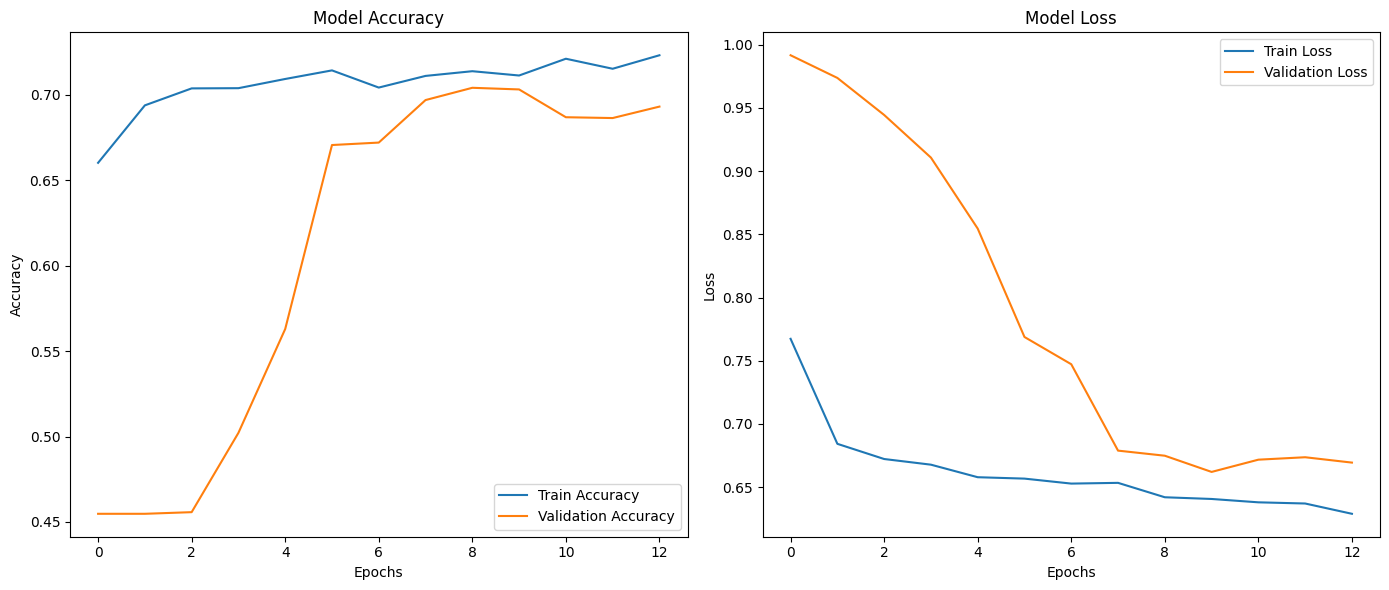

In [60]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot model accuracy on the first subplot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot model loss on the second subplot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [61]:
# Load test dataset
test_df = pd.read_csv('test.csv')

# Perform the same feature engineering on the test dataset
test_featureEng = test_df.copy()
for i, func in enumerate(functions_list):
    test_featureEng[functions_name_list[i]] = func(test_featureEng)

# Prepare the test data (no need to drop the label column since it doesn't exist)
X_test_final = test_featureEng

# Scale the test data
X_test_final_scaled = scaler.transform(X_test_final)

# Make predictions
predictions = model.predict(X_test_final_scaled)

# Convert predictions to class labels
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Create a DataFrame with the predictions
results = pd.DataFrame({
    'id': test_df['id'],  # Assuming there is an 'id' column in the test dataset
    'nforest_type': predicted_classes
})
results

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [62]:
# # Save the results to a CSV file
results.to_csv('forest-NN-2.csv', index=False)
print("Completely saved")

Completely saved


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


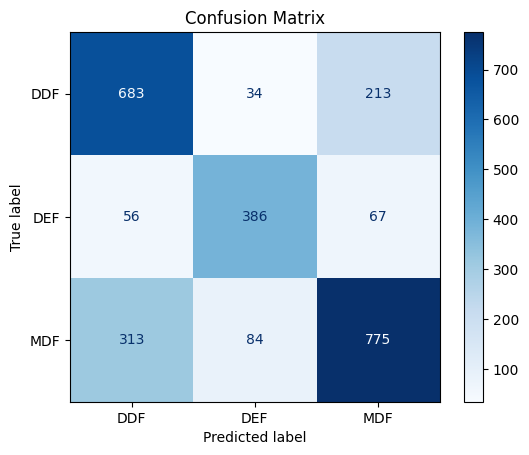

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()